# observations of brain size and weight and IQ (Willerman et al. 1991), the data are a mixture of numerical and categorical values:

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

In [38]:
print("Shape; ",data.shape) 
print("\n")
print(data.columns)
print(data['Gender'])

Shape;  (40, 8)


Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')
0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [39]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [40]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))
print(groupby_gender.value_counts())

('Female', 109.45)
('Male', 115.25)
Gender  Unnamed: 0  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
Female  1           133   132  124  118.0   64.5    816932       1
        5           137   132  134  147.0   65.0    951545       1
        38          88    86   94   139.0   64.5    893983       1
        36          133   129  128  153.0   66.5    948066       1
        35          83    90   81   143.0   66.5    834344       1
        6           99    90   110  146.0   69.0    928799       1
        7           138   136  131  138.0   64.5    991305       1
        8           92    90   98   175.0   66.0    854258       1
        11          132   129  124  118.0   64.5    833868       1
        14          140   120  147  155.0   70.5    856472       1
        15          96    100  90   146.0   66.0    878897       1
        16          83    71   96   135.0   68.0    865363       1
        17          132   132  120  127.0   68.5    852244       1
        19          101   112  

In [41]:
data[data['Gender'] == 'Female']['VIQ'].mean()


109.45

In [42]:
# Plotting Data 

array([[<AxesSubplot: xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot: xlabel='Height', ylabel='Weight'>,
        <AxesSubplot: xlabel='MRI_Count', ylabel='Weight'>],
       [<AxesSubplot: xlabel='Weight', ylabel='Height'>,
        <AxesSubplot: xlabel='Height', ylabel='Height'>,
        <AxesSubplot: xlabel='MRI_Count', ylabel='Height'>],
       [<AxesSubplot: xlabel='Weight', ylabel='MRI_Count'>,
        <AxesSubplot: xlabel='Height', ylabel='MRI_Count'>,
        <AxesSubplot: xlabel='MRI_Count', ylabel='MRI_Count'>]],
      dtype=object)

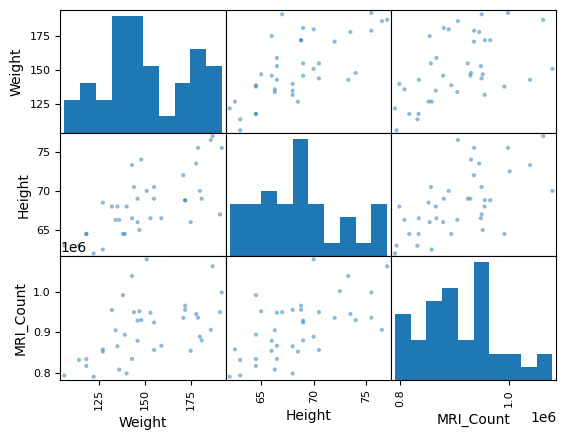

In [43]:

pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])  

In [45]:
from scipy import stats

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value

In [48]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28)

In [49]:
With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

SyntaxError: invalid syntax (2937446056.py, line 1)

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [50]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)  

Ttest_indResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217)

In [51]:
PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test:

SyntaxError: invalid syntax (2378804760.py, line 1)

In [52]:
stats.ttest_ind(data['FSIQ'], data['PIQ']) 

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [57]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is equivalent to a 1-sample test on the difference:

In [58]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   


Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [59]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/Users/thomassonderman/Documents/Git/python_ds_example_functions/pdef/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)